# Stable Baselines, a Fork of OpenAI Baselines - Getting Started

Github Repo: [https://github.com/hill-a/stable-baselines](https://github.com/hill-a/stable-baselines)

Medium article: [https://medium.com/@araffin/stable-baselines-a-fork-of-openai-baselines-df87c4b2fc82](https://medium.com/@araffin/stable-baselines-a-fork-of-openai-baselines-df87c4b2fc82)

## Install Dependencies and Stable Baselines Using Pip

List of full dependencies can be found in the [README](https://github.com/hill-a/stable-baselines).

```

sudo apt-get update && sudo apt-get install cmake libopenmpi-dev zlib1g-dev
```


```

pip install stable-baselines
```

In [0]:
!apt install cmake libopenmpi-dev zlib1g-dev
!pip install stable-baselines==2.1.1

## Import policy, RL agent, ...

In [0]:
import gym
import numpy as np

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.ppo2 import PPO2

## Create the Gym env and instantiate the agent

For this example, we will use CartPole environment, a classic control problem.

"A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. "

Cartpole environment: [https://gym.openai.com/envs/CartPole-v1/](https://gym.openai.com/envs/CartPole-v1/)

![Cartpole](https://cdn-images-1.medium.com/max/1143/1*h4WTQNVIsvMXJTCpXm_TAw.gif)

Note: vectorized environments allow to easily multiprocess training. In this example, we are using only one process, hence the DummyVecEnv.

We chose the MlpPolicy because input of CartPole is a feature vector, not images.

The type of action to use (discrete/continuous) will be automatically deduced from the environment action space



In [0]:
env = gym.make('CartPole-v1')
# vectorized environments allow to easily multiprocess training
# we demonstrate its usefulness in the next examples
env = DummyVecEnv([lambda: env])  # The algorithms require a vectorized environment to run

model = PPO2(MlpPolicy, env, verbose=0)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


We create a helper function to evaluate the agent:

In [0]:
def evaluate(model, num_steps=1000):
  """
  Evaluate a RL agent
  :param model: (BaseRLModel object) the RL Agent
  :param num_steps: (int) number of timesteps to evaluate it
  :return: (float) Mean reward for the last 100 episodes
  """
  episode_rewards = [0.0]
  obs = env.reset()
  for i in range(num_steps):
      # _states are only useful when using LSTM policies
      action, _states = model.predict(obs)
      # here, action, rewards and dones are arrays
      # because we are using vectorized env
      obs, rewards, dones, info = env.step(action)
      
      # Stats
      episode_rewards[-1] += rewards[0]
      if dones[0]:
          obs = env.reset()
          episode_rewards.append(0.0)
  # Compute mean reward for the last 100 episodes
  mean_100ep_reward = round(np.mean(episode_rewards[-100:]), 1)
  print("Mean reward:", mean_100ep_reward, "Num episodes:", len(episode_rewards))
  
  return mean_100ep_reward

Let's evaluate the un-trained agent, this should be a random agent.

In [0]:
# Random Agent, before training
mean_reward_before_train = evaluate(model, num_steps=10000)

Mean reward: 22.9 Num episodes: 438


## Train the agent and evaluate it

In [0]:
# Train the agent for 10000 steps
model.learn(total_timesteps=10000)

In [0]:
# Evaluate the trained agent
mean_reward = evaluate(model, num_steps=10000)

Mean reward: 212.8 Num episodes: 47


Apparently the training went well, the mean reward increased a lot ! 

## Bonus: Train a RL Model in One Line

In [0]:
model = PPO2('MlpPolicy', "CartPole-v1", verbose=1).learn(1000)

In [0]:
!apt-get -qq -y install  libnvtoolsext1 > /dev/null
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null
!pip -q install gym
!pip -q install pyglet
!pip -q install pyopengl
!pip -q install pyvirtualdisplay

In [0]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

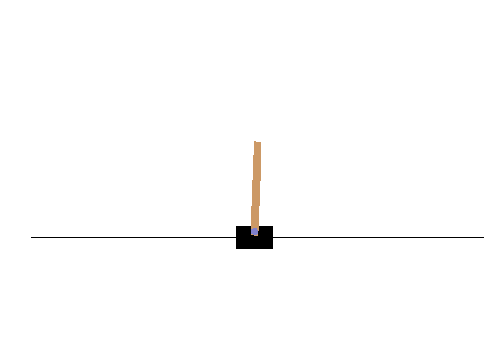

In [0]:

import gym
import numpy as np

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.ppo2 import PPO2


model = PPO2('MlpPolicy', "CartPole-v1", verbose=0).learn(10000)

env = gym.make('CartPole-v1')
obs = env.reset()

frames =[]

frames.append(env.render(mode='rgb_array'))


for x in range(1000):

  action, _states = model.predict(obs)
  
  frames.append(env.render(mode='rgb_array'))
  
  obs, rewards, done, info = env.step(action)
  if done:
    break
  

env.close()

import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
HTML(ani.to_jshtml())